In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


Remember that in week 1 we had generated open-loop commands for a set of manoeuvres such as
$[("straight", 5), ("right", 90), ("straight", 6), ("left", 90)]$

Let us do repeat, but with a change. Instead of left/ right, simply use turn and a signed angle.
$[("straight", 5), ("turn", -90), ("straight", 6), ("turn", 90)]$

You can use cubic_spiral() from previous notebook

In [2]:
def cubic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    #-2*x**3 + 3*x**2
    return (theta_f-theta_i)*(-2*x**3 + 3*x**2) + theta_i

In [3]:
num_st_pts = 10
num_pts = 50
dt = 0.8/num_pts
v=1
def straight(dist, curr_pose, n=num_st_pts):
    # the straight-line may be along x or y axis
    #curr_theta will determine the orientation
    x_i, y_i,theta_i= curr_pose
    time =  dist / v
    dt = time/num_st_pts
    theta = np.array([theta_i]*num_st_pts)
    x = x_i+np.cumsum(v*np.cos(theta)*dt)
    y = y_i+np.cumsum(v*np.sin(theta)*dt)
    return x,y,theta
    # pass

def turn(change, curr_pose, n=num_pts):
    # adjust scaling constant for desired turn radius
    # theta = cubic_spiral(curr_theta, curr_theta + change, n)
    x_i, y_i,theta_i= curr_pose 
    change = np.deg2rad(change)
    theta = cubic_spiral(theta_i, theta_i + change, n)
    x = x_i+np.cumsum(v*np.cos(theta)*dt)
    y = y_i+np.cumsum(v*np.sin(theta)*dt)
    return x,y,theta
    # pass    

def generate_trajectory(route, init_pose = (0, 0,np.pi/2)):
    curr_pose = init_pose
    func = {'straight': straight, 'turn': turn}
    x, y, t = np.array([]), np.array([]),np.array([])
    x = np.concatenate((x,np.array([curr_pose[0]])))
    y = np.concatenate((y,np.array([curr_pose[1]])))
    t = np.concatenate((t,np.array([curr_pose[2]])))
    for manoeuvre, command in route:
        px, py, pt = func[manoeuvre](command,curr_pose)#calling function
        # print(px)
        curr_pose = px[-1],py[-1],pt[-1]
        x = np.concatenate((x,px))
        y = np.concatenate((y,py))
        t = np.concatenate((t,pt))
        # update x, y, t using np.concatenate and px,py,pt
        
    return x, y, t

### Plot the trajectory
plot the trajectory and the change in orientation in separate plots

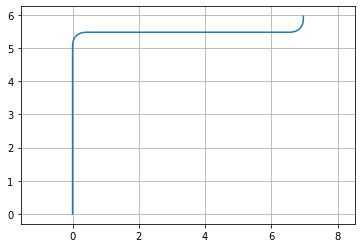

In [4]:
x,y,t = generate_trajectory([("straight",5),("turn",-90),("straight",6),("turn",90)])
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(x, y)
plt.grid()

## Convert 

A* or Djikstra gives a sequence of $\{(x_i, y_i)\}$. We need to convert it to a sequence of {"straight", "turn"} if we are use generate_trajectory()

Let us look at a simple method. Assume that the successive line segments are orthogonal (reasonable in the grid world). If we find the corner point, we can demarcate. 

For 3 consecutive points $(x_1,y_1), (x_2, y_2), (x_3, y_3)$ if 
$(x_1 - x_2)(y_3-y2) - (x_3-x_2)(y_2-y_1) \neq 0$, then $(x_2, y_2)$ is a corner point

Think about what is happening if

1. $(x_1 - x_2)(y_3-y2) - (x_3-x_2)(y_2-y_1) > 0$

2. $(x_1 - x_2)(y_3-y2) - (x_3-x_2)(y_2-y_1) < 0$

In [5]:
def euclidean(node1, node2):
    #write code here
    x1,y1 = node1
    x2,y2 = node2
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

[('straight', 1.0), ('straight', 1.0), ('straight', 1.0), ('straight', 1.0), ('turn', -90), ('straight', 1.0), ('straight', 1.0), ('straight', 1.0), ('turn', -90), ('straight', 5.0)]


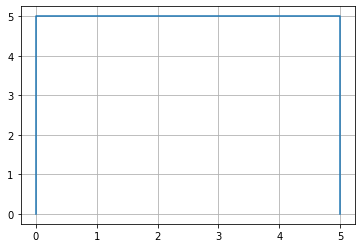

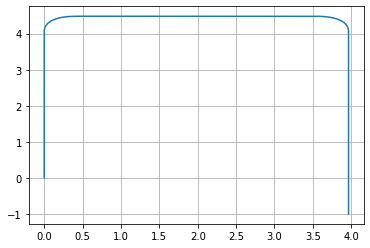

In [6]:
# here is a code to generate 2 orthogonal 
# line segments of lengths 6

s1, s2 = 6, 6
y1 = list(range(s1))
x1 = [0]*(s1-1)

x2 = list(range(s2))
y2 = [y1[-1]]*(s2-1)

x, y = x1+x2, y1+y2
x.append(5)
y.append(0)
plt.figure()
plt.plot(x, y)
plt.grid()

#find the corner point and plot it
commands = []
# for i in range(len(x)-2):
i=0
cor=1
while i <len(x)-2:
    x1,y1 = x[i],y[i]
    x2,y2 = x[i+1],y[i+1]
    x3,y3 = x[i+2],y[i+2]
    eval = cor*((x1-x2)*(y3-y2)-(x3-x2)*(y2-y1))
    if eval != 0:
        i+=1
        cor*=-1
        if eval >0:
            ## left turn +90
            commands.append(("turn",90))
            
        else:
            commands.append(("turn",-90))
    else:
        commands.append(("straight",euclidean( (x2,y2), (x1,y1)) ))
    i+=1

commands.append(("straight",euclidean( (x[-1],y[-1]), (x[-2],y[-2])) ))
print(commands)
x,y,t = generate_trajectory(commands,init_pose=(0,0,np.pi/2))
plt.figure()
plt.plot(x, y)
plt.grid()


# Fix a turn radius r
# Shorten the straight segments by r
# convert this into {("straight", s1), ("turn", +/- 90), ("straight", s2)}


# use generate_trajectory() and plot the smooth path

# More complex example
Borrow the Grid world code from week 2 notebook. Get the A* path and smoothen it using the routine from above

###Thinice Map - https://movingai.com/benchmarks/sc1/index.html
(downoad from - https://drive.google.com/file/d/1y466NWSfCFIHJQNMTSqZueqXCu5p-DM-/view?usp=sharing)

In [7]:
### upload thinice.txt here
from google.colab import files
uploaded = files.upload()

Saving ThinIce.txt to ThinIce.txt


In [8]:
grid = np.loadtxt("ThinIce.txt")
# print(arr)

In [9]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
# grid = np.load("astar_grid.npy")
nodes = grid.shape
# print(nodes)
# you can define your own start/ end
start = (0, 50)
goal = (500, 700)
# print(grid[start[0],start[1]])
# print(grid[goal[0],goal[1]])
# visualize the start/ end and the robot's environment
# fig, ax = plt.subplots(figsize=(12,12))
# ax.imshow(grid, cmap=plt.cm.Dark2)
# ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
# ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
# plt.show()

In [10]:
#initialize graph
G = nx.grid_2d_graph(nodes[0],nodes[1])

deleted_nodes = 0 # counter to keep track of deleted nodes
#loop to remove nodes
for i in range(nodes[0]):
    for j in range(nodes[1]):
        if grid[i,j]==1:
            G.remove_node((i,j))
            deleted_nodes+=1
print(f"removed {deleted_nodes} nodes")
print(f"number of occupied cells in grid {np.sum(grid)}")

removed 130499 nodes
number of occupied cells in grid 130499.0


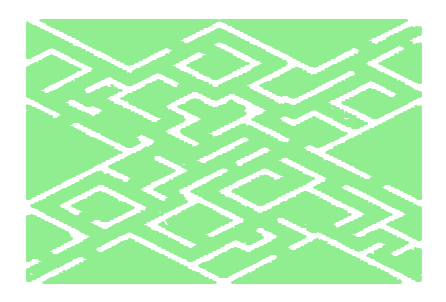

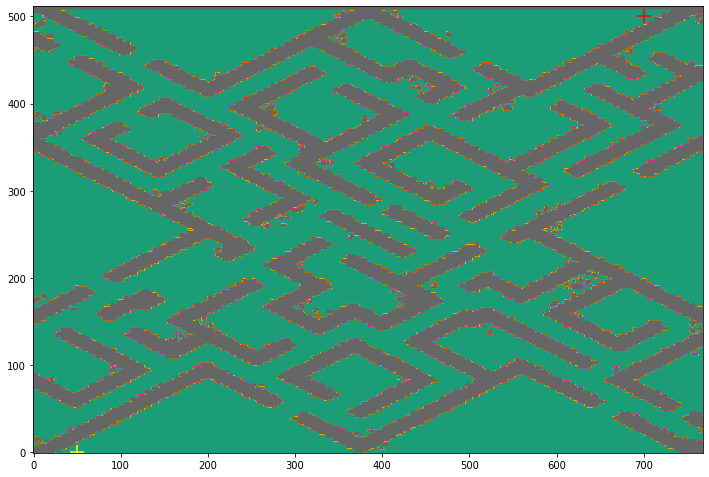

In [11]:
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color='lightgreen', node_size=2)
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2,origin='lower')
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

In [12]:
nx.set_edge_attributes(G,1,name='cost')
astar_path = nx.astar_path(G,start,goal,heuristic=euclidean,weight='cost')
# print(astar_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

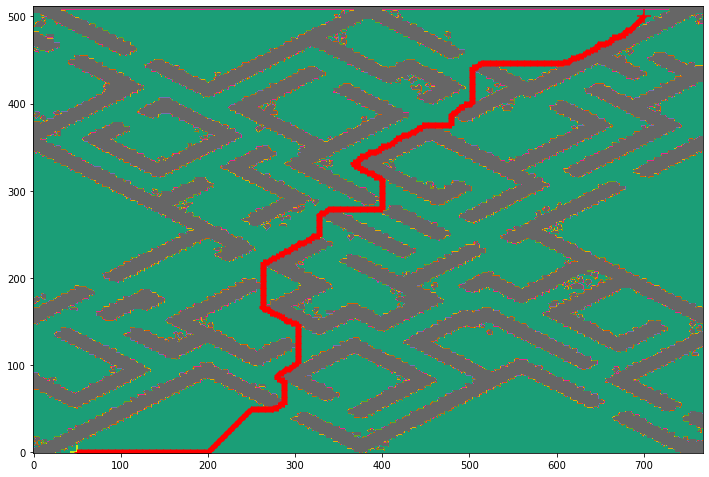

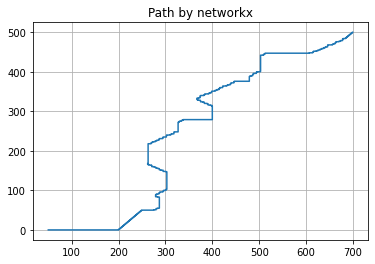

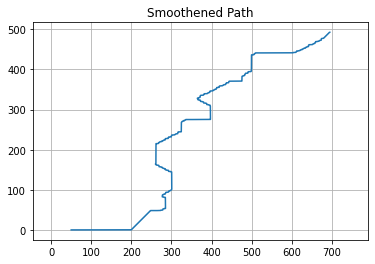

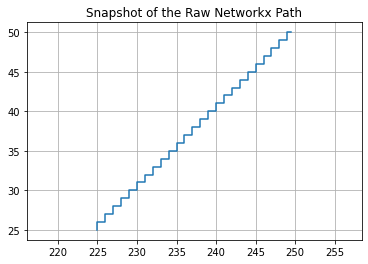

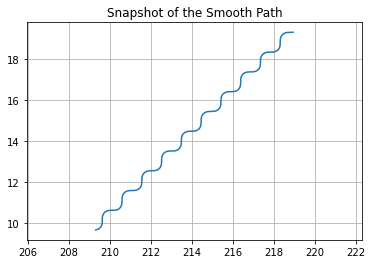

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2,origin='lower')
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
x=[]
y =[]
# for s in astar_path[200:210]:
for i in range(len(astar_path)-1):
# for i in range(145,160):
    s = astar_path[i]
    r = astar_path[i+1]
    x.append(s[1])
    x.append((s[1]+r[1])/2)
    y.append(s[0])
    y.append((s[0]+r[0])/2)
    ax.plot(s[1], s[0],'r+')
# astar_path[-1]
#   x, y = x1+x2, y1+y2
#   y.append()
plt.figure()
plt.title('Path by networkx')

# plt.axes().set_aspect("equal","datalim")
plt.plot(x, y)
plt.grid()

#find the corner point and plot it
commands = []
# for i in range(len(x)-2):
i=0
cor=-1
while i <len(x)-2:
    x1,y1 = x[i],y[i]
    x2,y2 = x[i+1],y[i+1]
    x3,y3 = x[i+2],y[i+2]
    eval = cor*((x1-x2)*(y3-y2)-(x3-x2)*(y2-y1))
    if eval != 0:
        i+=1
        cor*=-1
        if eval >0:
            ## left turn +90
            commands.append(("turn",90))
            
        else:
            commands.append(("turn",-90))
    else:
        commands.append(("straight",euclidean( (x2,y2), (x1,y1)) ))
    i+=1

commands.append(("straight",euclidean( (x[-1],y[-1]), (x[-2],y[-2])) ))
# print(commands)
theta = np.arctan2(y[1]-y[0], x[1]-x[0])
theta = np.arctan2(np.sin(theta), np.cos(theta))
# print (theta)
x_f,y_f,t_F = generate_trajectory(commands,init_pose=(x[0],y[0],theta))
plt.figure()
plt.title('Smoothened Path')

plt.axes().set_aspect("equal","datalim")
plt.plot(x_f, y_f)
plt.grid()

plt.figure()
plt.title('Snapshot of the Raw Networkx Path')

plt.axes().set_aspect("equal","datalim")
plt.plot(x[400:500], y[400:500])
plt.grid()
plt.figure()
plt.title('Snapshot of the Smooth Path')

plt.axes().set_aspect("equal","datalim")
plt.plot(x_f[4000:5000], y_f[4000:5000])
plt.grid()


This approach of path planning with 90 deg turns juxtaposed between straight segments works well in structured environments.

In the general case, where $A^*$/ $RRT^*$ path is a sequence of piecewise linear segments, we will perform a path optimization routine directly. 

There are 3 more advanced manouevres that you may need

1. Lane-change: Robot has to move laterally but without change to the orientation

2. Inplace: Robot has to turn around itself
    
3. Reverse: Straights or turns in reverse

Lane-change has to be applied as a combination of 2 cubic spirals (90 to 0 and 0 to 90). Inplace and Reverse are situational constructs